# Introduction

Weather predictions have been one of the most interesting subjects to explore since global warming has reached its peak. The variations in temperature, wind speeds, rainfall measures have been a huge concern for the scientists working in the field of meteorology. Australia had recently faced a unique yet ambiguous situation in rainfall. The rainfall has been unpredictable and haywire. The data is region wise covering major parts of Australia though we will be predicting the rainfall in Australia as whole. The aim of this project is to predict whether it will rain or not. It is a classic example of classification model in predictive analysis. 

# Dataset

The data used in this project is taken from Kaggle.com repository. (https://www.kaggle.com/jsphyg/weather-dataset-rattle-package). The data consists of the daily weather conditions in Australia over a period of time. 

# Project Definition

The project aims to predict whether it will rain in Australia or not?

# Data Exploration

In [1]:

import pandas as pd
df = pd.read_csv('C:/Users/Manali/Desktop/Project Management/Quarter 4/Predictive Analysis/weatherAUS.csv', encoding = 'latin1')


In [2]:

print('Number of samples:',len(df))

Number of samples: 142193


In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.groupby('RainTomorrow').size()

RainTomorrow
No     110316
Yes     31877
dtype: int64

Create a column called OUTPUT_LABEL based on your data that is 0 for your negative class and 1 for your positive class

In [5]:
df['OUTPUT_LABEL'] = (df.RainTomorrow == 'Yes').astype('int')

In [6]:
df[['OUTPUT_LABEL']].head()

,OUTPUT_LABEL
0,0
1,0
2,0
3,0
4,0


Calculate the prevalence of the positive class

In [7]:
def calc_prevalence(y_actual):   
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [8]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.224


The prevalence of positive class gives the approximate idea as per the data available whether it will rain omorrow of not.

In [9]:
print('Number of columns:',len(df.columns))

Number of columns: 25


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [11]:
df[list(df.columns)[:10]].head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE


In [12]:
df[list(df.columns)[10:20]].head()

,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am
0,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9
1,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2
2,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0
3,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1
4,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8


In [13]:
df[list(df.columns)[20:25]].head()

,Temp3pm,RainToday,RISK_MM,RainTomorrow,OUTPUT_LABEL
0,21.8,No,0.0,No,0
1,24.3,No,0.0,No,0
2,23.2,No,0.0,No,0
3,26.5,No,1.0,No,0
4,29.7,No,0.2,No,0


In [14]:
## dropping risk column cause it will help the algorithm cheat 
#df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM','Date'],axis=1)
df.shape

(142193, 25)

There are total of 25 columns in this dataset. The main column that provides the necessary data for prediction is RainTomorrow. On the basis of values in it we can predict the rainfall conditions for tomorrow. 

# Feature Engineering

Feature engineering is related to selecting one feature and making it compatible with our algorithm by training it using various models to predict the outcome necessary. In my project the data is mostly numerical and categorical. There are total of 25 different variables including sunshine, temperature at various hours, rainfall today, risk, evaporation etc. 

In [15]:

import numpy as np

## Numerical Data


In [16]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'OUTPUT_LABEL'],
      dtype='object')

In [17]:
cols_num = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

In [18]:
df[cols_num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 16 columns):
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustSpeed    132923 non-null float64
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
dtypes: float64(16)
memory usage: 17.4 MB


In [19]:
df[cols_num].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

## Categorical data

In [20]:
df.groupby('Location').size()

Location
Adelaide            3090
Albany              3016
Albury              3011
AliceSprings        3031
BadgerysCreek       2928
Ballarat            3028
Bendigo             3034
Brisbane            3161
Cairns              2988
Canberra            3418
Cobar               2988
CoffsHarbour        2953
Dartmoor            2943
Darwin              3192
GoldCoast           2980
Hobart              3188
Katherine           1559
Launceston          3028
Melbourne           2435
MelbourneAirport    3009
Mildura             3007
Moree               2854
MountGambier        3030
MountGinini         2907
Newcastle           2955
Nhil                1569
NorahHead           2929
NorfolkIsland       2964
Nuriootpa           3002
PearceRAAF          2762
Penrith             2964
Perth               3193
PerthAirport        3009
Portland            2996
Richmond            2951
Sale                3000
SalmonGums          2955
Sydney              3337
SydneyAirport       3005
Townsville      

In [21]:
cols_cat = ['Location', 'WindGustDir', 'WindDir3pm', 'WindDir9am','RainToday']

In [22]:
df[cols_cat].isnull().sum()

Location           0
WindGustDir     9330
WindDir3pm      3778
WindDir9am     10013
RainToday       1406
dtype: int64

In [23]:
# fill missing categorical values with UNK
for c in cols_cat:
    df[c] = df[c].fillna('UNK')

In [24]:
df.groupby('WindGustDir').size()

WindGustDir
E      9071
ENE    7992
ESE    7305
N      9033
NE     7060
NNE    6433
NNW    6561
NW     8003
S      8949
SE     9309
SSE    8993
SSW    8610
SW     8797
UNK    9330
W      9780
WNW    8066
WSW    8901
dtype: int64

In [25]:
df['WindGustDir'].head()

0      W
1    WNW
2    WSW
3     NE
4      W
Name: WindGustDir, dtype: object

In [26]:
pd.get_dummies(df['WindGustDir'].head(), prefix = 'WindGustDir', drop_first=True)

,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,0
4,1,0,0


For all categorical data performing one-hot encoding

In [27]:
df_cats = pd.get_dummies(df[cols_cat], drop_first = True)

In [28]:
df_cats.head()

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_UNK,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,RainToday_UNK,RainToday_Yes
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
cols_all_cats = list(df_cats.columns)

In [30]:
cols_all_cats

['Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Location_Watsonia',
 'Locat

In [31]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,OUTPUT_LABEL
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,0


In [32]:
df = pd.concat([df,df_cats],axis = 1)

In [33]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_UNK,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,RainToday_UNK,RainToday_Yes
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,0,0,0,0,0,1,0,0,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,0,0,0,0,0,0,0,0,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,0,0,0,0,0,1,0,0,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1,0,0,0,0,0,0,0,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,0,0,0,0,0,0,0,0,0,0


In [34]:
cols_input = cols_num + cols_all_cats
df_data = df[cols_input + ['OUTPUT_LABEL']]


In [35]:
df_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_UNK,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,RainToday_UNK,RainToday_Yes,OUTPUT_LABEL
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,1,0,0,0,0,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,1,0,0,0,0,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df_data.dtypes

MinTemp                   float64
MaxTemp                   float64
Rainfall                  float64
Evaporation               float64
Sunshine                  float64
WindGustSpeed             float64
WindSpeed9am              float64
WindSpeed3pm              float64
Humidity9am               float64
Humidity3pm               float64
Pressure9am               float64
Pressure3pm               float64
Cloud9am                  float64
Cloud3pm                  float64
Temp9am                   float64
Temp3pm                   float64
Location_Albany             uint8
Location_Albury             uint8
Location_AliceSprings       uint8
Location_BadgerysCreek      uint8
Location_Ballarat           uint8
Location_Bendigo            uint8
Location_Brisbane           uint8
Location_Cairns             uint8
Location_Canberra           uint8
Location_Cobar              uint8
Location_CoffsHarbour       uint8
Location_Dartmoor           uint8
Location_Darwin             uint8
Location_GoldC

# Building Training/Validation/Test Samples

Training sample- This sample is the one with which we train our models on. It is visible to the algorithm models for training. it is used to fit the models.
Validation sample- It is the hidden data. It cannot be seen by the models and is used to validate the accuracy of our models so as to make changes likewise to improve the models.

Test sample- It is used to fit the final model to give an unadulterated evaluation of that model. This data is also hidden from the models. 

In [37]:

# shuffling the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [38]:
# 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [39]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [40]:
# rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [41]:
print('Training: %.3f'%(len(df_train_all)/len(df_data)))
print('Validation %.3f'%(len(df_valid)/len(df_data)))
print('Test: %.3f'%(len(df_test)/len(df_data)))

Training: 0.700
Validation 0.150
Test: 0.150


In [42]:
# checking the prevalence of each 
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 21329):0.222
Valid prevalence(n = 21329):0.222
Train all prevalence(n = 99535):0.225


In [43]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 142193)


We need to balance the dataset so as to avoid only negatives getting counted as a result of which we get a dumb model. This will be a wrong prediction. Hence we balance the negatives with the number of positives by dropping few negatives or converting few of them to positives.

In [44]:
# your code here
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 44798):0.500


In [45]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [46]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

In [47]:
# filling the missing values by mean
df_mean = df_train_all[cols_input].mean(axis = 0)

In [48]:
df_mean

MinTemp                     12.200164
MaxTemp                     23.240869
Rainfall                     2.375146
Evaporation                  5.483040
Sunshine                     7.620461
WindGustSpeed               40.000892
WindSpeed9am                14.007160
WindSpeed3pm                18.625523
Humidity9am                 68.828602
Humidity3pm                 51.461928
Pressure9am               1017.642943
Pressure3pm               1015.244375
Cloud9am                     4.433828
Cloud3pm                     4.507838
Temp9am                     16.998609
Temp3pm                     21.702207
Location_Albany              0.021148
Location_Albury              0.021148
Location_AliceSprings        0.021319
Location_BadgerysCreek       0.020415
Location_Ballarat            0.021229
Location_Bendigo             0.021610
Location_Brisbane            0.022444
Location_Cairns              0.021379
Location_Canberra            0.023771
Location_Cobar               0.021349
Location_Cof

In [49]:
# saving the means
df_mean.to_csv('df_mean.csv',index=True)

C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [50]:
# loading the means so we know how to do it for the test data
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])

df_mean_in.head()

,col,mean_val
0,MinTemp,12.200164
1,MaxTemp,23.240869
2,Rainfall,2.375146
3,Evaporation,5.483040
4,Sunshine,7.620461


In [51]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [52]:
df_train_all = fill_my_missing(df_train_all, df_mean_in,cols_input)
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)

In [53]:
assert df_train_all.isnull().sum().sum() == 0, 'null values in df_train_all'
assert df_train.isnull().sum().sum() == 0, 'null values in df_train'
assert df_valid.isnull().sum().sum() == 0, 'null values in df_valid'

In [54]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (99535, 114)
Training shapes: (44798, 114) (44798,)
Validation shapes: (21329, 114) (21329,)


In [55]:
# scaling the dataset
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [57]:

scaler = pickle.load(open(scalerfile, 'rb'))

In [58]:
# transforming the data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

# Model Selection 

In [59]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

Since we balanced our training data, let's set our threshold at 0.5 to label a predicted sample as positive. 

In [60]:
thresh = 0.5

## Model Selection: baseline models

### K nearest neighbors (KNN)

K Nearest Neighbour is a simple machine learning algorithm. It considers the K number of nearest neighbours to a set data point we want to know. K can be any integer. It selects the nearest training data points of the new data point. Finally it assigns the data point to the same class as that of majority of the selected training data points. 


In [61]:

# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

In [62]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.840
accuracy:0.752
recall:0.695
precision:0.784
specificity:0.795
prevalence:0.500
 
Validation:
AUC:0.828
accuracy:0.774
recall:0.694
precision:0.494
specificity:0.782
prevalence:0.222
 


### Logistic Regression

In [63]:

# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.875
accuracy:0.792
recall:0.781
precision:0.798
specificity:0.803
prevalence:0.500
 
Validation:
AUC:0.874
accuracy:0.796
recall:0.786
precision:0.528
specificity:0.799
prevalence:0.222
 


### Stochastic Gradient Descent

In [65]:

from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [66]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descend
Training:
AUC:0.865
accuracy:0.781
recall:0.774
precision:0.785
specificity:0.788
prevalence:0.500
 
Validation:
AUC:0.864
accuracy:0.784
recall:0.781
precision:0.509
specificity:0.785
prevalence:0.222
 


### Naive Bayes

In [67]:

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [68]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.743
accuracy:0.671
recall:0.737
precision:0.652
specificity:0.606
prevalence:0.500
 
Validation:
AUC:0.738
accuracy:0.627
recall:0.743
precision:0.343
specificity:0.594
prevalence:0.222
 


### Decision Tree Classifier

In [69]:

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [70]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.901
accuracy:0.819
recall:0.790
precision:0.838
specificity:0.843
prevalence:0.500
 
Validation:
AUC:0.831
accuracy:0.777
recall:0.745
precision:0.498
specificity:0.783
prevalence:0.222
 


### Random Forest

In [71]:

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [72]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.854
accuracy:0.771
recall:0.759
precision:0.778
specificity:0.784
prevalence:0.500
 
Validation:
AUC:0.846
accuracy:0.774
recall:0.759
precision:0.494
specificity:0.778
prevalence:0.222
 


### Gradient Boosting Classifier

In [73]:

from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [74]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.910
accuracy:0.829
recall:0.825
precision:0.833
specificity:0.834
prevalence:0.500
 
Validation:
AUC:0.875
accuracy:0.793
recall:0.794
precision:0.523
specificity:0.793
prevalence:0.222
 


## Analyze results baseline models

In [75]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_valid_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_valid_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_valid_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_valid_auc,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_valid_specificity,gbc_valid_specificity,]})

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

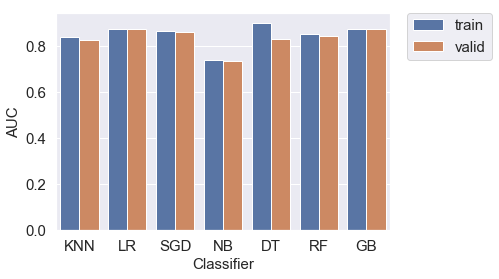

In [77]:

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

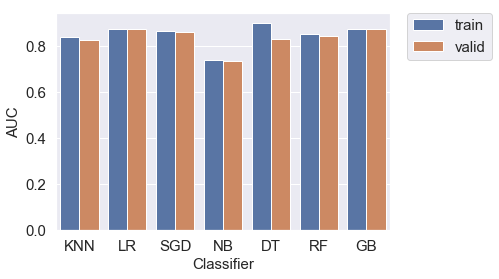

In [78]:

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

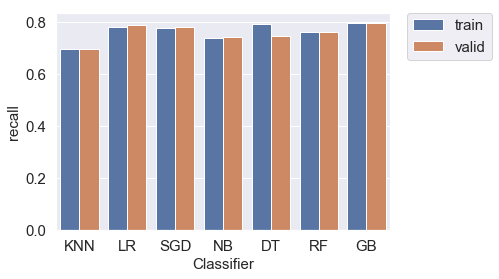

In [79]:
ax = sns.barplot(x="classifier", y="recall", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('recall', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

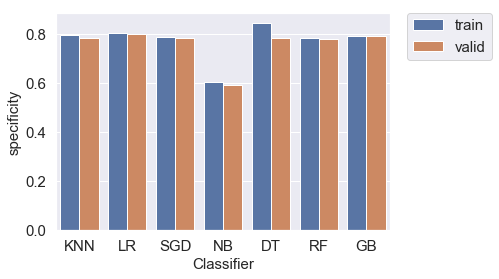

In [80]:
ax = sns.barplot(x="classifier", y="specificity", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('specificity', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

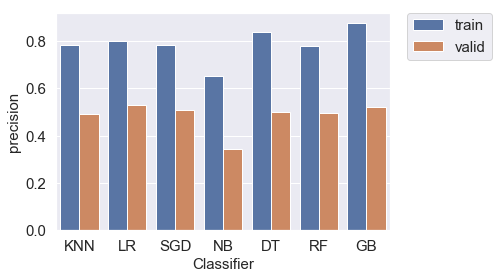

In [81]:
ax = sns.barplot(x="classifier", y="precision", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('precision', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

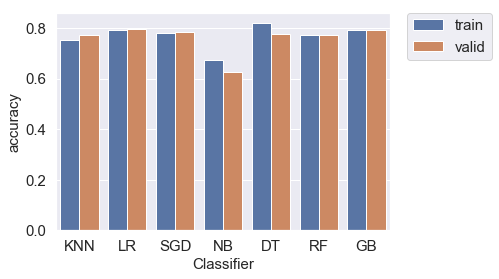

In [82]:
ax = sns.barplot(x="classifier", y="accuracy", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('accuracy', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

In [83]:
import time

my_params = [10, 20, 30, 40, 50]# list of parameters

# initialize arrays for storing the results
train_metrics = np.zeros(len(my_params))
valid_metrics = np.zeros(len(my_params))

# train a model for each param in a list
t1 = time.time()
for jj in range(len(my_params)):
    my_param = my_params[jj]
    
    # fit model
    model= LogisticRegression(max_iter = 1)                                
    model.fit(X_train_tf, y_train)
    # get predictions
    y_train_preds = model.predict_proba(X_train_tf)[:,1]
    y_valid_preds = model.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    metric_train = roc_auc_score(y_train, y_train_preds) 
    metric_valid = roc_auc_score(y_valid, y_valid_preds) 

    # save aucs
    train_metrics[jj] = metric_train
    valid_metrics[jj] = metric_valid
    
    # print the time
    t2 = time.time()
    print(my_param, t2-t1)
    t1 = time.time()

C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


10 1.6293368339538574


C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


20 1.660332441329956


C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


30 0.8527176380157471


C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


40 0.6170535087585449
50 0.4950568675994873


C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


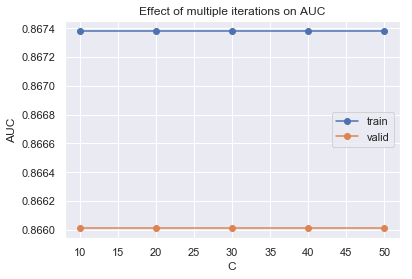

In [84]:
import matplotlib.pyplot as plt

plt.plot(my_params, train_metrics,'o-',label = 'train')
plt.plot(my_params, valid_metrics,'o-',label = 'valid')

plt.xlabel('C')
plt.ylabel('AUC')
plt.title('Effect of multiple iterations on AUC')
plt.legend()
plt.show()

## Learning Curves

In [85]:

import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

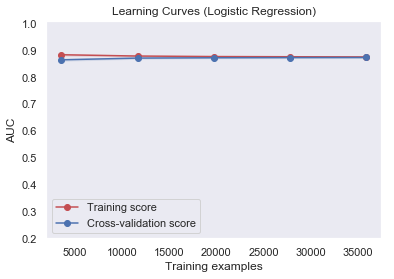

In [86]:
title = "Learning Curves (Logistic Regression)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = LogisticRegression(C=2.0, penalty='l1')
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

The best model is Logistic regression which is clearly underfitting. This means it has high bias. There are few techniques to reduce high bias which include increasing model complexity, adding new features and reduce regularization.

## Feature Importance

In [87]:

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [89]:
feature_importances.head()

,importance
Humidity3pm,1.199467
Pressure9am,0.955690
WindGustSpeed,0.700295
Temp3pm,0.315508
Cloud3pm,0.273638


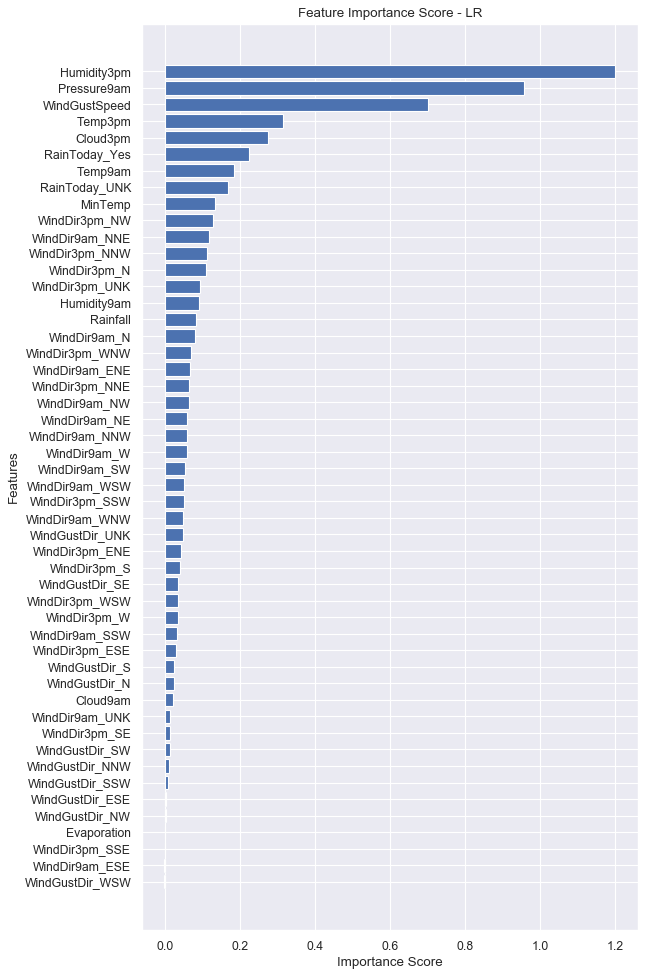

In [90]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - LR')
plt.yticks(ylocs, feature_labels)
plt.show()

The humidity at 3 pm shows a positive response. There is no much difference in the feature importances in Logistic regression.

## Hyperparameter tuning

Week 4: Using RandomizedSearchCV, optimize a few of your baseline models. 
    Note that GradientBoosting Classifier may take a while so you might need to adjust the number of iterations or specific parameters. If this takes too long on your computer, feel free to take that one out. 

In [91]:

lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [92]:
from sklearn.model_selection import RandomizedSearchCV

max_iter = range(50,250,50)
# maximum number of features to use at each split
penalty = ['l1','l2']
# maximum dept
C = [0.10,0.50,0.80,1.0]



random_grid = {'max_iter':max_iter,
              'penalty':penalty,
              'C':C}

print(random_grid)

{'max_iter': range(50, 250, 50), 'penalty': ['l1', 'l2'], 'C': [0.1, 0.5, 0.8, 1.0]}


Week 4: Make a plot comparing the performance of the optimized models to the baseline models. 

In [93]:
# Your code here
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [94]:
# create a baseline model
lr = LogisticRegression()

# create the randomized search cross-validation
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring,verbose = 1, random_state = 42)

In [95]:
import time
# fit the random search model (this will take a few minutes)
t1 = time.time()
lr_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manali\Anaconda3\envs\aly_

C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.9min finished
C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


190.00063800811768


In [96]:
lr_random.best_params_

{'penalty': 'l1', 'max_iter': 50, 'C': 1.0}

In [97]:
lr=LogisticRegression(C=2.0, penalty='l1')
lr.fit(X_train_tf, y_train)

y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Logistic Regression')
lr_train_base_auc = roc_auc_score(y_train, y_train_preds)
lr_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(lr_train_base_auc))
print('Validation AUC:%.3f'%(lr_valid_base_auc))

print('Optimized Logistic Regression')
y_train_preds_random = lr_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = lr_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

lr_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
lr_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(lr_train_opt_auc))
print('Validation AUC:%.3f'%(lr_valid_opt_auc))

C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Baseline Logistic Regression
Training AUC:0.875
Validation AUC:0.874
Optimized Logistic Regression
Training AUC:0.875
Validation AUC:0.874


In [104]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(50,100,150)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(2,20,2)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid_rf = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid_rf)

{'n_estimators': range(50, 100, 150), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [105]:
# create a baseline model
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid_rf, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring,verbose = 1, random_state = 42)

In [106]:
import time
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  5.4min finished


341.72641706466675


In [107]:
from sklearn.model_selection import RandomizedSearchCV
rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 4,
 'max_features': 'auto',
 'max_depth': 18,
 'criterion': 'gini'}

In [108]:
rf=RandomForestClassifier(max_depth = 3, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_p = precision_score(y_train, (y_train_preds > thresh))
rf_valid_base_p = precision_score(y_valid, (y_valid_preds > thresh))

print('Training AUC:%.3f'%(rf_train_base_p))
print('Validation AUC:%.3f'%(rf_valid_base_p))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_opt_p = precision_score(y_train, (y_train_preds_random > thresh))
rf_valid_opt_p = precision_score(y_valid, (y_valid_preds_random > thresh))

print('Training AUC:%.3f'%(rf_train_opt_p))
print('Validation AUC:%.3f'%(rf_valid_opt_p))

C:\Users\Manali\Anaconda3\envs\aly_6020\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Baseline Random Forest
Training AUC:0.757
Validation AUC:0.463
Optimized Random Forest
Training AUC:0.933
Validation AUC:0.531


In [109]:
df_results = pd.DataFrame({'classifier':['LR','LR','RF','RF'],
                           'data_set':['baseline','optimized']*2,
                             'auc':[lr_valid_base_auc, lr_valid_opt_auc,
                                    rf_valid_base_p,rf_valid_opt_p]
                            })

In [110]:
df_results

,classifier,data_set,auc
0,LR,baseline,0.873564
1,LR,optimized,0.873572
2,RF,baseline,0.463447
3,RF,optimized,0.531109


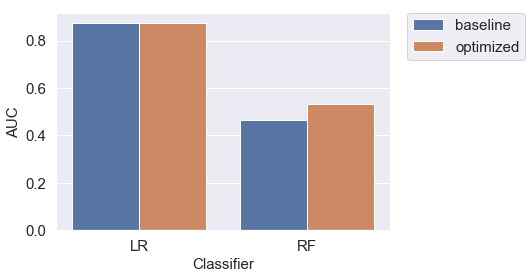

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

## Pick your best model

I have selected logistic regression as my best model as after hyperparameter tuning it has high AUC value and the difference between the validation and training AUC is 0.01%. 

In [112]:

pickle.dump(lr_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

# Model Evaluation

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [114]:
# load the model, columns, mean values, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))

In [115]:
# load the data
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [116]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [117]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [118]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.875
accuracy:0.792
recall:0.781
precision:0.799
specificity:0.803
prevalence:0.500
 
Validation:
AUC:0.874
accuracy:0.796
recall:0.786
precision:0.528
specificity:0.799
prevalence:0.222
 
Test:
AUC:0.869
accuracy:0.792
recall:0.768
precision:0.522
specificity:0.799
prevalence:0.222
 


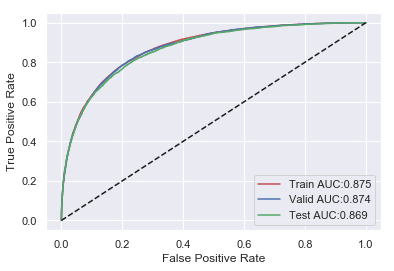

In [119]:
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve

#prec_train, recall_train, thresholds = precision_recall_curve(y_train, y_train_preds)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)
#pre_train = precision_score(y_train, (y_train_preds > thresh))

#prec_valid, recall_valid, thresholds2 = precision_recall_curve(y_valid, y_valid_preds)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)
#pre_valid = precision_score(y_valid, (y_valid_preds > thresh))

#prec_test, recall_test, thresholds3 = precision_recall_curve(y_test, y_test_preds)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)
#pre_test = precision_score(y_test, (y_test_preds > thresh))

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Conclusion

From the analysis we can finally conclude that the logistic regression model works best for my dataset. After hyperparameter tuning the AUC rate remained similar to earlier. In feature analysis the top 3 important features according to the analysis are humidity at 3pm, windgust speed and pressure at 9 am. As a result to predict rainfall the next day we need to consider these three features. Collecting more records will be more useful for the models. 